<a href="https://colab.research.google.com/github/ikyath/RNN_Introduction_Fundamentals/blob/master/RNN_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Time Series

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data











Example - Weather

Weather is a dynamical System

  See : Chaos Theory,Butterfly effect

![alt text](https://i.ytimg.com/vi/D6jln7pqn70/maxresdefault.jpg)

This is that even if we have the exact deterministic equations to describe a weather system our forecast will still become more and more incorrect.

The further into the future we try to predict that's pretty counterintuitive because you would think if you have the exact equation for something then you should be able to calculate all the future values precisely but due to the butterfly effect this is not actually true.

As the saying goes a butterfly flapping its wings in Tokyo can cause a tornado in America.

Small and decisions like numerical round off error and your computer will ultimately lead it to your weather forecast being completely wrong eventually.This is actually really relevant to us because when you think of time series and our own ends you automatically

![alt text](https://media.graytvinc.com/images/810*455/lnk+wx1.jpg)






















Another type of Sequential data is Text but in machine learning we don't consider it as sequence

Forecasting is about to predict the next values in a timeseries

# RNNs



*  The brain consists of billion of neurons, without any single duration.
*  A Decision made now is not only based only on what you hear/see now.
*  We can think and reason based on past inputs.
*  What happens if we add feedback loops and memory to neural network.









Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

### Problem of Long-term dependencies



The basic idea of RNN is connecting the previous information to the present task. But there are scenarios where we would need only the most recent information and other cases where we need a whole lot of old, meaning information needed more context. 
Let us denote this as  the gap between the relevant information and the place where it is needed. As the gap grows, RNNs will not be able to learn to connect the information.
LSTMs do not have this kind of problem and are able to learn the long term dependencies. Let us discuss how

# LSTMs

LSTMs are special kind of RNNs, designed explicitly to overcome the long term dependency problem. The repeating modules of neural networks in LSTM have a complex structure compared to that of RNN.
The repeating module in LSTM has four interacting layers
Memory cell

*   Memory cell
*   Forget gate
*   Input 
*   Output






![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

Now lets look familiarize with the notations 
![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png)



*   Memory/Cell-state - This is represented as the horizontal layer running through the top of the diagram. It has some linear transformations as pointwise multiplication and addition
*   Gates - These are used to optionally let information through using sigmoid neural network layers, which outputs in either 0 or 1, representing the information which we want to leave or the information we want to persist.



## Walk-through of LSTM

Let us consider an example of text prediction, where we are trying to predict the next word based on the previous words to understand the working of LSTM metwork.

Firstly, we need to decide what information we want to remember and what to forget. This is decided using a sigmoid layer called the 'forget gate' layer. Here the output of sigmod activation function as we know is between 0 and 1 for each number in the cell state C(t-1), taking as inputs  h(t-1), the output from the previous layer and the x(t), the current input of the layer.
A '0' indicates that we can forget about that information and discard it and '1' indicates that we need to remember it.

Let us understand it by going to back to our language model. Suppose, we are talking about a subject's gender, but we have the next input as a new subject, we would want to ignore that information about the gender of the previous subject. This is achieved using the forget gate as discussed above.

The next step is to decide what new information we are going to add to the cell state.

This is done in 2 steps.
First the sigmoid layer or the input gate layer is used to decide what values we want to update and then the tanh layer results in a vector of new values that can be added. So the state gets updated with the new values.

So in our example, we want to add the information about the gender of the new subject which replaces the old value, that we want to forget.The cell state gets updated.

Finally we want the output. In this case, the sigmoid layer decides what parts of the cell state we want to ouput. The cell state C(t) is also passes through tanh which outputs values between -1 and +1. This is multiplied by the output of the sigmoid layer and results in the required parts.

So in our language example, as the network has seen the subject, it might want to output something relevant to what comes next. Say, if a verb is followed next, the network might output  if the subject is singular or plural, so that we will know what form of verb to be added.

There are many variants of LSTM, 
- One introduced by Gers & Schmidhuber (2000), is adding “peephole connections.”, which means that the gate layers can take a look at the cell state.
- Another variation is to use coupled forget and input gates
- Another important variant is the Gated Recurrent Unit, which we are going to dicuss in a little detail here.

# GRUs



GRUs are imporved version of standard recurrent neural networks also defined as RNNs which have gated mechanism.
*  It was introduced by Kyunghyun Cho in 2014. [Refer Here](https://arxiv.org/abs/1406.1078)
*  The GRU is like a long short-term memory (LSTM) with forget gate but has fewer parameters than LSTM, as it lacks an output gate.
*   The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. GRU’s got rid of the cell state and used the hidden state to transfer information. It also only has two gates, a reset gate and update gate.











#### Architecture of GRUs

![alt text](https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png)

Update Gate : First, we have the Update gate. This gate decides what information should be thrown away or kept. Information from the previous hidden state and information from the current input is passed through the sigmoid function. Values come out between 0 and 1. The closer to 0 means to forget, and the closer to 1 means to keep.

Reset Gate :
The reset gate is another gate is used to decide how much past information to forget.

#LSTM Example

Here we are trying to predict the stock price of Apple. Its pretty challangeing to predict since there is Brownian Motion which states that we couldnt predict future variations in stock prices using past data but its actually possible to predict trends in data 



*   We will make an LSTM Model that will try to capture upward and downward trends in the selected stock price
*   We are gonna implement a Stacked LSTM and dropout layers to avoid overfitting.



We will try to predict the last 60 days using the data from 2000 to 2019.

In [8]:
!pip install alpha-vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.3-cp36-none-any.whl size=14870 sha256=7c9063fdf05ca80e29348bc15aab1f7a41f4293f34fa4b1f3ba43f6ce3d94c73
  Stored in directory: /root/.cache/pip/wheels/d4/75/c2/483b0a988fd965b1128c1396a0ffadfb8903bd2bb569220048
Successfully built alpha-vantage


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [73]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='5W7LO5BBKDO63VCC', output_format='pandas',indexing_type='integer')
dataset, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
print(dataset.shape)

(5031, 6)


In [74]:
dataset.head()

,index,1. open,2. high,3. low,4. close,5. volume
index,,,,,,
0,2020-04-16,287.38,288.1975,282.3502,286.69,38297396.0
1,2020-04-15,282.40,286.3300,280.6300,284.43,32788641.0
2,2020-04-14,280.00,288.2500,278.0500,287.05,48748672.0
3,2020-04-13,268.31,273.7000,265.8300,273.25,32755731.0
4,2020-04-09,268.70,270.0700,264.7000,267.99,40529123.0


Lets sort the data in increasing order of date

In [0]:
dataset = dataset.iloc[::-1]

In [0]:
dataset = dataset.set_index(pd.Series(range(dataset.shape[0])))

In [77]:
dataset.head()

,index,1. open,2. high,3. low,4. close,5. volume
0,2000-04-17,109.50,123.94,109.06,123.87,3656800.0
1,2000-04-18,123.50,126.87,119.37,126.87,3490400.0
2,2000-04-19,126.19,130.25,119.75,121.12,4644200.0
3,2000-04-20,123.69,124.75,117.06,118.87,6447500.0
4,2000-04-24,115.00,120.50,114.75,120.50,3960900.0


Lets us visualize the complete trend from 2000 to current day.

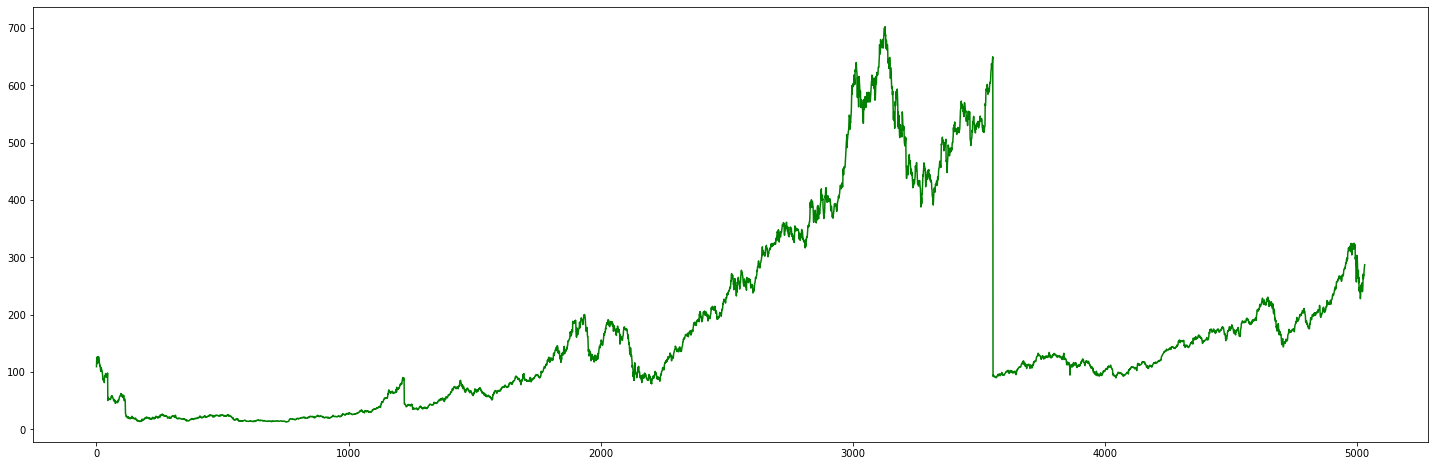

In [78]:
plt.figure(figsize=(25,8))
plt.plot(dataset['1. open'],color='green')

We are trying to predict the trend in last 60days, 
Please find below for the actual trend in last 60 days

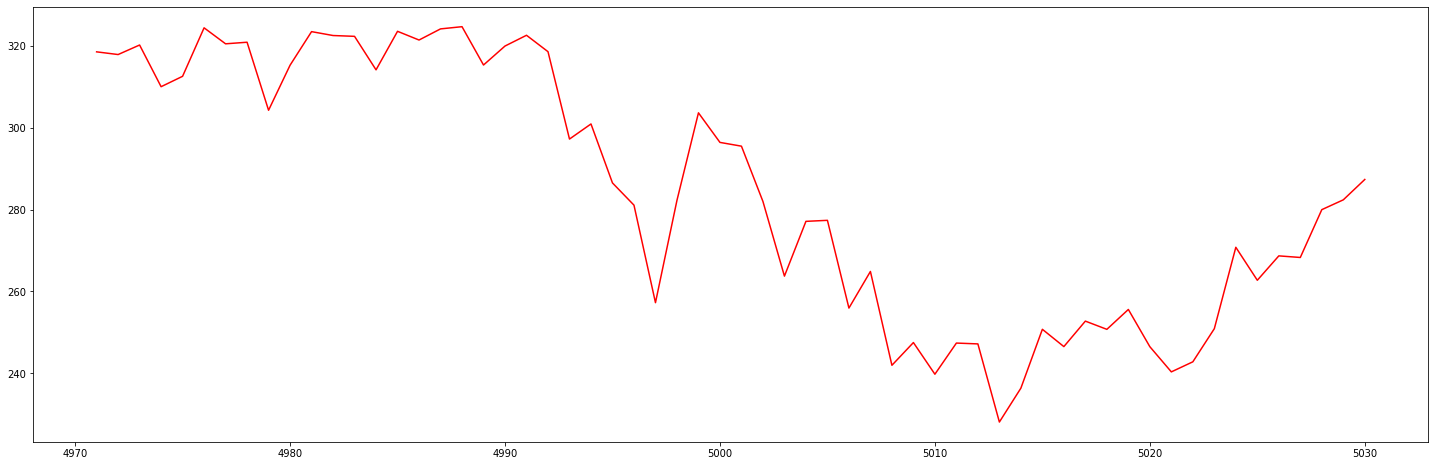

In [79]:
plt.figure(figsize=(25,8))
plt.plot(dataset.iloc[-60:,1:2],color='red')

In [80]:
dataset.head()

,index,1. open,2. high,3. low,4. close,5. volume
0,2000-04-17,109.50,123.94,109.06,123.87,3656800.0
1,2000-04-18,123.50,126.87,119.37,126.87,3490400.0
2,2000-04-19,126.19,130.25,119.75,121.12,4644200.0
3,2000-04-20,123.69,124.75,117.06,118.87,6447500.0
4,2000-04-24,115.00,120.50,114.75,120.50,3960900.0


In [0]:
dataset_train = dataset.iloc[:4971,:]

In [0]:
dataset_test = dataset.iloc[-60:,:]

In [83]:
print(dataset_train.shape,dataset_test.shape)

(4971, 6) (60, 6)


To create a numpy array of train values

In [0]:
train = dataset_train.iloc[:,1:2].values

We have a numpy array of one column

In [85]:
train[:10]

array([[109.5 ],
       [123.5 ],
       [126.19],
       [123.69],
       [115.  ],
       [122.12],
       [126.62],
       [117.19],
       [127.12],
       [124.87]])

## Feature Scaling

In [0]:
scale = MinMaxScaler(feature_range=(0,1))

In [0]:
train_scaled = scale.fit_transform(train)

In [88]:
train_scaled[:10]

array([[0.13998724],
       [0.16029416],
       [0.16419599],
       [0.16056975],
       [0.14796496],
       [0.15829248],
       [0.1648197 ],
       [0.15114154],
       [0.16554495],
       [0.16228134]])

## Creating a data structure with 120 timesteps and one output

This means that model is going to take 120 stock prices before time T in which RNNs are going to learn and understand some correlations and based on its understanding its going to predict the next output

We can try the above by considering different timestamps

In [0]:
time_len = 120

In [0]:
X_train = []
y_train = []
for i in range(time_len,dataset_train.shape[0]):
    X_train.append(train_scaled[i-time_len:i,0])
    y_train.append(train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train) #converting to numpy arrays so that they can be accepted in futute to our RNNs

X_train will contain the 120 previous stock prices for current financial day.

y_train will contain will contain stock price for current financial day

In [91]:
print(X_train[0],y_train[0])

[0.13998724 0.16029416 0.16419599 0.16056975 0.14796496 0.15829248
 0.1648197  0.15114154 0.16554495 0.16228134 0.15993154 0.1536799
 0.14813902 0.14188738 0.14374402 0.14116214 0.13209654 0.12819471
 0.1349105  0.13789852 0.13276377 0.13145833 0.13055902 0.12511967
 0.11714195 0.11242784 0.10617621 0.10952685 0.1088016  0.10825041
 0.10716254 0.09973601 0.11714195 0.11650373 0.11456006 0.11695338
 0.12275536 0.12149343 0.12094224 0.11342868 0.11850541 0.11351571
 0.11677932 0.11251487 0.12403179 0.05440805 0.06202315 0.05916568
 0.05730904 0.05916568 0.05848394 0.05812132 0.0577587  0.05677236
 0.05839691 0.05730904 0.05743959 0.05961533 0.06383627 0.06547533
 0.06601201 0.06402483 0.06564939 0.06601201 0.06121087 0.06093528
 0.06000696 0.05739607 0.05413246 0.05345073 0.05368281 0.05698993
 0.05246439 0.05413246 0.05223231 0.04724261 0.05291404 0.05060776
 0.05069479 0.05097038 0.05078182 0.04909924 0.05018711 0.04969395
 0.04915726 0.051333   0.05568449 0.05404543 0.05459662 0.05581

We can see our dataframe with 120 previews of previous stock of the taken financial day

We need to create the new dimensionality of the above mentioned new data structure, because that exactly is accepted by the future recurrent network. [Reference](https://keras.io/layers/recurrent/)

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

We will build our model below :

Since capturing the trends of a stock price is complex, we need to have high number of neurons

In [0]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 120, 50)           10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 120, 50)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 120, 50)           20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 120, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120, 50)           20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 120, 50)           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)               

RMSProp optimizer is preferred for RNNs [Reference](https://keras.io/optimizers/)

In [0]:
model.compile(optimizer='RMSProp',loss='mean_squared_error')

In [96]:
model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
4851/4851 [==============================] - 40s 8ms/step - loss: 0.0081
Epoch 2/20
 128/4851 [..............................] - ETA: 39s - loss: 0.0031

KeyboardInterrupt: ignored

In [0]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['1. open'],dataset_test['1. open']),axis=0)

In [0]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-120:].values

In [0]:
inputs = inputs.reshape(-1,1)

In [0]:
inputs = scale.transform(inputs)

In [0]:
X_test = []
for i in range(120,180):
    X_test.append(inputs[i-120:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [0]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scale.inverse_transform(predicted_stock_price)

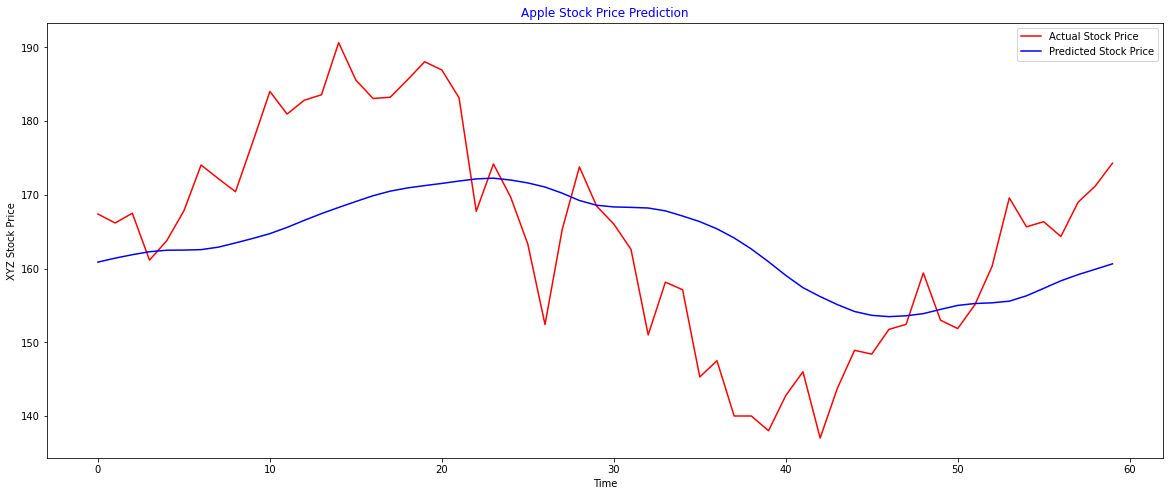

In [70]:
plt.figure(figsize=(20,8))
plt.plot(real_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction',color='blue')
plt.xlabel('Time')
plt.ylabel('XYZ Stock Price')
plt.legend()
plt.show()

# References

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21